<a href="https://colab.research.google.com/github/ducluu196/coursera-/blob/master/laptop_price_predictor_revisit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
URL= 'https://raw.githubusercontent.com/ducluu196/coursera-/master/laptops.csv'
df = pd.read_csv(URL,  encoding='latin-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [84]:
df

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [131]:
#drop unessccessary index collum
df = df.drop(['Unnamed: 0'], axis =1 )

In [86]:
df.ScreenResolution.unique

<bound method Series.unique of 0               IPS Panel Retina Display 2560x1600
1                                         1440x900
2                                Full HD 1920x1080
3               IPS Panel Retina Display 2880x1800
4               IPS Panel Retina Display 2560x1600
                           ...                    
1298     IPS Panel Full HD / Touchscreen 1920x1080
1299    IPS Panel Quad HD+ / Touchscreen 3200x1800
1300                                      1366x768
1301                                      1366x768
1302                                      1366x768
Name: ScreenResolution, Length: 1303, dtype: object>

In [132]:
# screen resolution are the 9 digit of the screen resolution column
#however some screen resolution only contain 8 digits like 1366x768 there will be an emty space, pd.strip() is use to remove the space
df['resolution'] = df['ScreenResolution'].str[-9:]
df['resolution']= df['resolution'].str.strip()
#atempt to covert resolution into numeric by covert it to n*n value
df['resolution1'] = df['resolution'].str.split('x').str[0].astype(int)
df['resolution2'] = df['resolution'].str.split('x').str[1].astype(int)
df['resolution'] = df['resolution1'] * df['resolution2']
df['resolution'].unique()

array([4096000, 1296000, 2073600, 5184000, 1049088, 3317760, 5760000,
       2304000, 3393024, 8294400, 3110400, 3686400, 1440000, 4990464,
       3840000])

In [133]:
#I realized that some screen model can feature both IPS and touch screen 
df['IPS'] = np.where(df['ScreenResolution'].str.contains("IPS"), 1,  0 )

In [134]:
#isolate touch screena as it a unique feature which could affect laptop price
df['TouchScreen'] = np.where(df['ScreenResolution'].str.contains("Touchscreen"), 1 , 0 )
print(df[['IPS','TouchScreen']])



      IPS  TouchScreen
0       1            0
1       0            0
2       0            0
3       1            0
4       1            0
...   ...          ...
1298    1            1
1299    1            1
1300    0            0
1301    0            0
1302    0            0

[1303 rows x 2 columns]


In [ ]:
df.Cpu.unique()
#As we can see there are quite a wide varaiety of CPU in the column which could be categorized into futher detail
## challege facing: case mismath, 
### many core i series has no generation marker which would cause some confusion
### AMD cpu can not just categorize by extract the first couple digit like intel core series cpu
### intel cpu also contain many 

In [91]:
AMD = df[df.Cpu.str.contains("AMD")]
AMD.Cpu.unique()
#AMD has quite a few varaiety in CPU class A4, A6, A9, A10, A12, E-series, Fx, Ryzen (there does seem to more than 1 ryzen class)

array(['AMD A9-Series 9420 3GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'AMD E-Series E2-6110 1.5GHz', 'AMD A6-Series 9220 2.5GHz',
       'AMD Ryzen 1700 3GHz', 'AMD FX 9830P 3GHz',
       'AMD E-Series 6110 1.5GHz', 'AMD A6-Series 9220 2.9GHz',
       'AMD E-Series 9000e 1.5GHz', 'AMD A10-Series A10-9620P 2.5GHz',
       'AMD A6-Series A6-9220 2.5GHz', 'AMD A10-Series 9600P 2.4GHz',
       'AMD A8-Series 7410 2.2GHz', 'AMD A12-Series 9720P 2.7GHz',
       'AMD A12-Series 9720P 3.6GHz', 'AMD Ryzen 1600 3.2GHz',
       'AMD A10-Series 9620P 2.5GHz', 'AMD E-Series 7110 1.8GHz',
       'AMD A9-Series A9-9420 3GHz', 'AMD E-Series E2-9000 2.2GHz',
       'AMD A9-Series 9420 2.9GHz', 'AMD A6-Series 7310 2GHz',
       'AMD A12-Series 9700P 2.5GHz', 'AMD A4-Series 7210 2.2GHz',
       'AMD FX 8800P 2.1GHz', 'AMD E-Series 9000 2.2GHz',
       'AMD A9-Series 9410 2.9GHz'], dtype=object)

In [ ]:
intel = df[df.Cpu.str.contains("Intel")]
intel.Cpu.unique()

In [93]:
#investigate intel processor that not in the core i series
intelm = df[df.Cpu.str.contains("Intel Core M")]
intelm.Cpu.unique
#core m just like core i series which has 3 class m3 m5 m7, in some of the value below, there are no specification on which core m is it
#One thing that can be notice is that the clock speed of each core m corresponded to the the class 


<bound method Series.unique of 14           Intel Core M m3 1.2GHz
146        Intel Core M 6Y75 1.2GHz
457     Intel Core M m3-7Y30 2.2GHz
562        Intel Core M 6Y75 1.2GHz
592        Intel Core M 7Y30 1.0GHz
697     Intel Core M M3-6Y30 0.9GHz
794             Intel Core M 1.2GHz
911        Intel Core M 6Y75 1.2GHz
944     Intel Core M m7-6Y75 1.2GHz
953     Intel Core M M7-6Y75 1.2GHz
990        Intel Core M 6Y75 1.2GHz
1069            Intel Core M 1.1GHz
1080       Intel Core M 6Y75 1.2GHz
1110       Intel Core M 6Y54 1.1GHz
1193            Intel Core M 1.1GHz
1210            Intel Core M 1.2GHz
1261       Intel Core M 6Y30 0.9GHz
1275       Intel Core M 6Y30 0.9GHz
1289       Intel Core M 6Y30 0.9GHz
Name: Cpu, dtype: object>

In [94]:
#investigate intel core i series
inteli = df[df.Cpu.str.contains("Intel Core i")]
inteli.Cpu.unique
# we can clearly identify i3 from i5 from i7

<bound method Series.unique of 0             Intel Core i5 2.3GHz
1             Intel Core i5 1.8GHz
2       Intel Core i5 7200U 2.5GHz
3             Intel Core i7 2.7GHz
4             Intel Core i5 3.1GHz
                   ...            
1295    Intel Core i7 7500U 2.7GHz
1297    Intel Core i7 6500U 2.5GHz
1298    Intel Core i7 6500U 2.5GHz
1299    Intel Core i7 6500U 2.5GHz
1301    Intel Core i7 6500U 2.5GHz
Name: Cpu, Length: 1086, dtype: object>

In [95]:
intel1 = intel[~intel.Cpu.str.contains("Intel Core i")]
intel2 = intel1[~intel.Cpu.str.contains("Intel Core M")]
intel2.Cpu.unique()
# there are couple identifable in this case like Atom, Pentium, Celeron and Xeon

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


array(['Intel Atom x5-Z8350 1.44GHz', 'Intel Atom x5-Z8300 1.44GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Dual Core N3060 1.6GHz',
       'Intel Xeon E3-1505M V6 3GHz',
       'Intel Celeron Dual Core 3205U 1.5GHz',
       'Intel Celeron Dual Core 3855U 1.6GHz',
       'Intel Pentium Quad Core N3710 1.6GHz',
       'Intel Celeron Quad Core N3450 1.1GHz',
       'Intel Celeron Dual Core N3060 1.60GHz',
       'Intel Celeron Dual Core N3350 2.0GHz',
       'Intel Xeon E3-1535M v6 3.1GHz',
       'Intel Celeron Quad Core N3160 1.6GHz',
       'Intel Celeron Dual Core N3050 1.6GHz', 'Intel Atom Z8350 1.92GHz',
       'Intel Xeon E3-1535M v5 2.9GHz',
       'Intel Pentium Dual Core N4200 1.1GHz',
       'Intel Celeron Quad Core N3710 1.6GHz',
       'Intel Pentium Dual Core 4405U 2.1GHz',
       'Intel Atom X5-Z8350 1.44GHz',
       'Intel Pentium Dual Core 4405Y 1.5GHz',
   

In [96]:
#there should be other type of cpu other than intel and AMA
other1 = df[~df.Cpu.str.contains("Intel")]
other = other1[~other1.Cpu.str.contains("AMD")]
other.Cpu
#this value can be count as an outlier

1191    Samsung Cortex A72&A53 2.0GHz
Name: Cpu, dtype: object

In [135]:
cond1 = df['Cpu'].str.contains("AMD A4")
cond2 = df['Cpu'].str.contains("AMD A6")
cond3 = df['Cpu'].str.contains("AMD A8")
cond4 = df['Cpu'].str.contains("AMD A9")
cond5 = df['Cpu'].str.contains("AMD A10")
cond6 = df['Cpu'].str.contains("AMD A12")
cond7 = df['Cpu'].str.contains("AMD E-Series")
cond8 = df['Cpu'].str.contains("AMD FX")
cond9 = df['Cpu'].str.contains("Ryzen")
cond10 = df['Cpu'].str.contains("1.2GHz")
cond11 = df['Cpu'].str.contains("1.1GHz")
cond12 = df['Cpu'].str.contains("0.9GHz")
cond13 = df['Cpu'].str.contains("Intel Core M m3")
cond14 = df['Cpu'].str.contains("Intel Core i3")
cond15 = df['Cpu'].str.contains("Intel Core i5")
cond16 = df['Cpu'].str.contains("Intel Core i7")
cond17 = df['Cpu'].str.contains("Intel Celeron")
cond18 = df['Cpu'].str.contains("Intel Atom")
cond19 = df['Cpu'].str.contains("Intel Pentium")
cond20 = df['Cpu'].str.contains("Intel Xeon")



In [136]:
df['CPU'] = np.where(cond1, 'AMD A4',
                np.where(cond2, 'AMD A6',
                np.where(cond3, 'AMD A8', 
                np.where(cond4, 'AMD A9',
                np.where(cond5, 'AMD A10', 
                np.where(cond6, 'AMD A12', 
                np.where(cond7, 'AMD E-Series', 
                np.where(cond8, 'AMD FX', 
                np.where(cond9, 'AMD Ryzen', 
                np.where(cond10, 'Intel Core m7', 
                np.where(cond11, 'Intel Core m5', 
                np.where(cond12, 'Intel Core m3', 
                np.where(cond13, 'Intel Core m3', 
                np.where(cond14, 'Intel Core i3',
                np.where(cond15, 'Intel Core i5',
                np.where(cond16, 'Intel Core i7',
                np.where(cond17, 'Intel Celeron' ,        
                np.where(cond18, 'Intel Atom', 
                np.where(cond19, 'Intel Pentium', 
                np.where(cond20, 'Intel Xeon', 'other'))))))))))))))))))))

In [98]:
df[['Cpu','CPU']]

,Cpu,CPU
0,Intel Core i5 2.3GHz,Intel Core i5
1,Intel Core i5 1.8GHz,Intel Core i5
2,Intel Core i5 7200U 2.5GHz,Intel Core i5
3,Intel Core i7 2.7GHz,Intel Core i7
4,Intel Core i5 3.1GHz,Intel Core i5
...,...,...
1298,Intel Core i7 6500U 2.5GHz,Intel Core i7
1299,Intel Core i7 6500U 2.5GHz,Intel Core i7
1300,Intel Celeron Dual Core N3050 1.6GHz,Intel Celeron
1301,Intel Core i7 6500U 2.5GHz,Intel Core i7


In [137]:
df['Memory'].unique()
#there are feature that can be extract: type of the storage: SSD, HDD, Hybird, Flash. the numeric capacity of storage of each type and in some instance there are 2 storage

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [138]:
df['HDD'] = np.where(df['Memory'].str.contains("HDD"),
                     np.where(df['Memory'].str.contains("GB"),
                              df['Memory'].str.split('GB').str[0].str[:3], 
                              (df['Memory'].str.split('TB').str[0].str[:1].astype(int))*1000),
                     0)
df['HDD'] = df['HDD'].astype(int)

df['SSD'] = np.where(df['Memory'].str.contains("SSD"),
                     np.where(df['Memory'].str.contains("GB"),
                             df['Memory'].str.split('GB').str[0].str[:3], 
                              (df['Memory'].str.split('TB').str[0].str[:1].astype(int))*1000),
                      0 ) 
df['SSD'] = df['SSD'].astype(int)

df['Hybrid'] = np.where(df['Memory'].str.contains("Hybrid"),
                     np.where(df['Memory'].str.contains("GB"), df['Memory'].str.split('GB').str[0].str[:3], 1000),
                     0)
df['Hybrid'] = df['Hybrid'].astype(int)

df['Flash'] = np.where(df['Memory'].str.contains("Flash"),
                     np.where(df['Memory'].str.contains("GB"), df['Memory'].str.split('GB').str[0].str[:3], 1000),
                     0)
df['Flash'] = df['Flash'].astype(int)


In [139]:
df[['Memory', 'SSD', 'HDD', 'Hybrid', 'Flash']]

,Memory,SSD,HDD,Hybrid,Flash
0,128GB SSD,128,0,0,0
1,128GB Flash Storage,0,0,0,128
2,256GB SSD,256,0,0,0
3,512GB SSD,512,0,0,0
4,256GB SSD,256,0,0,0
...,...,...,...,...,...
1298,128GB SSD,128,0,0,0
1299,512GB SSD,512,0,0,0
1300,64GB Flash Storage,0,0,0,64
1301,1TB HDD,0,1000,0,0


In [140]:
df['Ram1'] = df.Ram.str[:-2].astype(int)
df['Weight1'] = df['Weight'].str[:-2].astype(float)
df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,resolution,resolution1,resolution2,IPS,TouchScreen,CPU,HDD,SSD,Hybrid,Flash,Ram1,Weight1
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,4096000,2560,1600,1,0,Intel Core i5,0,128,0,0,8,1.37
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1296000,1440,900,0,0,Intel Core i5,0,0,0,128,8,1.34
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,2073600,1920,1080,0,0,Intel Core i5,0,256,0,0,8,1.86
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,5184000,2880,1800,1,0,Intel Core i7,0,512,0,0,16,1.83
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,4096000,2560,1600,1,0,Intel Core i5,0,256,0,0,8,1.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,2073600,1920,1080,1,1,Intel Core i7,0,128,0,0,4,1.80
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,5760000,3200,1800,1,1,Intel Core i7,0,512,0,0,16,1.30
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,1049088,1366,768,0,0,Intel Celeron,0,0,0,64,2,1.50
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,1049088,1366,768,0,0,Intel Core i7,1000,0,0,0,6,2.19


In [334]:
#drop those temp and processed columns
#product name also get drop as it doesnt provide any additional information
df1 = df.drop([ 'ScreenResolution','Cpu','Ram', 'Memory', 'Weight', 'resolution1', 'resolution2', 'Product'], axis = 1 )
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Inches       1303 non-null   float64
 3   Gpu          1303 non-null   object 
 4   OpSys        1303 non-null   object 
 5   Price_euros  1303 non-null   float64
 6   resolution   1303 non-null   int64  
 7   IPS          1303 non-null   int64  
 8   TouchScreen  1303 non-null   int64  
 9   CPU          1303 non-null   object 
 10  HDD          1303 non-null   int64  
 11  SSD          1303 non-null   int64  
 12  Hybrid       1303 non-null   int64  
 13  Flash        1303 non-null   int64  
 14  Ram1         1303 non-null   int64  
 15  Weight1      1303 non-null   float64
dtypes: float64(3), int64(8), object(5)
memory usage: 163.0+ KB


In [270]:

##df1 = pd.concat([
#        df1.select_dtypes([], ['object']),
   #     df1.select_dtypes(['object']).apply(pd.Series.astype, dtype='float')
    #    ], axis=1)


In [335]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

categorical_cols = df1.columns[df1.dtypes==object].tolist()
df1[categorical_cols] = df1[categorical_cols].apply(lambda col: le.fit_transform(col))
# this method is quick but may not be the best one as it may not represent the information of the categorical attribute with this method


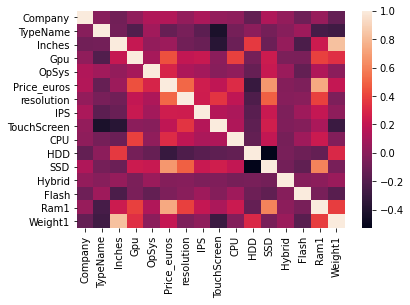

In [211]:
corr = df1.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
df2 = df1
#save a copy of data for other analysis

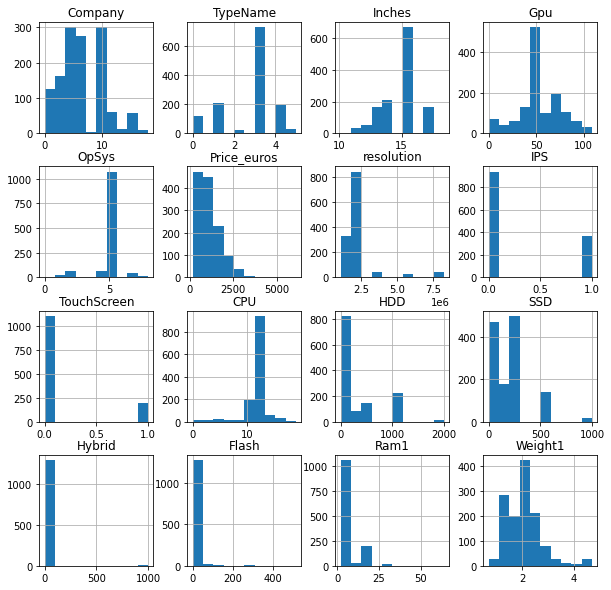

In [305]:



fig, axes = plt.subplots(len(df1.columns)//4, 4, figsize=(10,10))

i = 0
for triaxis in axes:
    for axis in triaxis:
        df1.hist(column = df1.columns[i], ax=axis)
        i = i+1

In [249]:
df1.describe()

,Company,TypeName,Inches,Gpu,OpSys,Price_euros,resolution,IPS,TouchScreen,CPU,HDD,SSD,Hybrid,Flash,Ram1,Weight1
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1.303000e+03,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,6.442824,2.582502,15.017191,54.682272,4.808903,1123.686992,2.168807e+06,0.280123,0.147352,12.067536,282.406754,182.750576,7.886416,4.555641,8.382195,2.038734
std,4.084128,1.245231,1.426304,21.623195,1.035253,699.009043,1.391292e+06,0.449231,0.354593,2.266780,421.851734,184.822109,85.440501,30.274090,5.084665,0.665475
min,0.000000,0.000000,10.100000,0.000000,0.000000,174.000000,1.049088e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.690000
25%,4.000000,1.500000,14.000000,46.000000,5.000000,599.000000,1.440000e+06,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.500000
50%,7.000000,3.000000,15.600000,53.000000,5.000000,977.000000,2.073600e+06,0.000000,0.000000,12.000000,0.000000,256.000000,0.000000,0.000000,8.000000,2.040000
75%,10.000000,3.000000,15.600000,72.000000,5.000000,1487.880000,2.073600e+06,1.000000,0.000000,13.000000,500.000000,256.000000,0.000000,0.000000,8.000000,2.300000
max,18.000000,5.000000,18.400000,109.000000,8.000000,6099.000000,8.294400e+06,1.000000,1.000000,19.000000,2000.000000,1000.000000,1000.000000,512.000000,64.000000,4.700000


,Company,TypeName,Inches,Gpu,OpSys,Price_euros,resolution,IPS,TouchScreen,CPU,HDD,SSD,Hybrid,Flash,Ram1,Weight1
1066,2,1,17.3,92,5,3975.0,2073600,1,0,13,0,1000,0,0,64,3.58


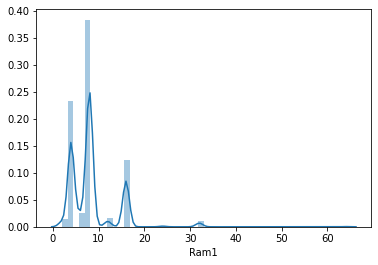

In [336]:
sns.distplot(df1.Ram1)
df1ram = df1.loc[(df1['Ram1'] > 32)]

df1.iloc[(df1ram.index)]

#outlier with ram over 32 

In [315]:
df1.drop([1066], inplace =  True)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,resolution,resolution1,resolution2,IPS,TouchScreen,CPU,HDD,SSD,Hybrid,Flash,Ram1,Weight1
196,Razer,Blade Pro,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32GB,1TB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49kg,6099.0,8294400,3840,2160,0,1,Intel Core i7,0,1000,0,0,32,3.49
610,Lenovo,Thinkpad P51,Notebook,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Xeon E3-1535M v6 3.1GHz,32GB,1TB SSD,Nvidia Quadro M2200M,Windows 10,2.5kg,4899.0,8294400,3840,2160,1,0,Intel Xeon,0,1000,0,0,32,2.50
749,HP,Zbook 17,Workstation,17.3,IPS Panel Full HD 1920x1080,Intel Xeon E3-1535M v5 2.9GHz,16GB,256GB SSD,Nvidia Quadro M2000M,Windows 7,3kg,4389.0,2073600,1920,1080,1,0,Intel Xeon,0,256,0,0,16,3.00
830,Razer,Blade Pro,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32GB,512GB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49kg,5499.0,8294400,3840,2160,0,1,Intel Core i7,0,512,0,0,32,3.49


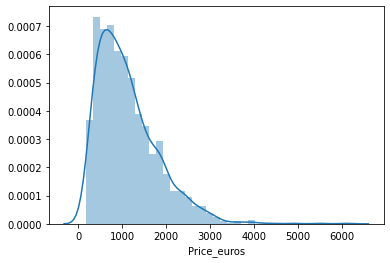

In [341]:
sns.distplot(df1.Price_euros)
df1price = df1.loc[(df1['Price_euros'] >= 4000)]

df.iloc[(df1price.index)]

#we outlier priced over 4000 
#upon inspection we found that the price is quite justified for the kind of specs these Item has but still quite far off from regular product

In [343]:
df1price.index
df1.drop([196, 610, 749, 830], inplace=True)

In [344]:
from sklearn.model_selection import train_test_split
X = df1.loc[:, df1.columns != 'Price_euros']
y = df1['Price_euros']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
print(X_train.shape)
print(X_test.shape)



(974, 15)
(325, 15)


In [345]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
from sklearn.metrics import mean_squared_error
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error

In [346]:
model1 = reg.fit(X_train,y_train)
model1.score (X_test, y_test)
predm1 = model1.predict(X_test)
print('R2 score :', model1.score(X_test, y_test))
print('Mean squared error: ', mean_squared_error(predm1,y_test))
print('maxerror: ', max_error(predm1,y_test))
print('mean absolute error : ', mean_absolute_error(predm1,y_test))



R2 score : 0.7665880435705977
Mean squared error:  105124.64439286354
maxerror:  1104.2414496684673
mean absolute error :  254.97804172731122


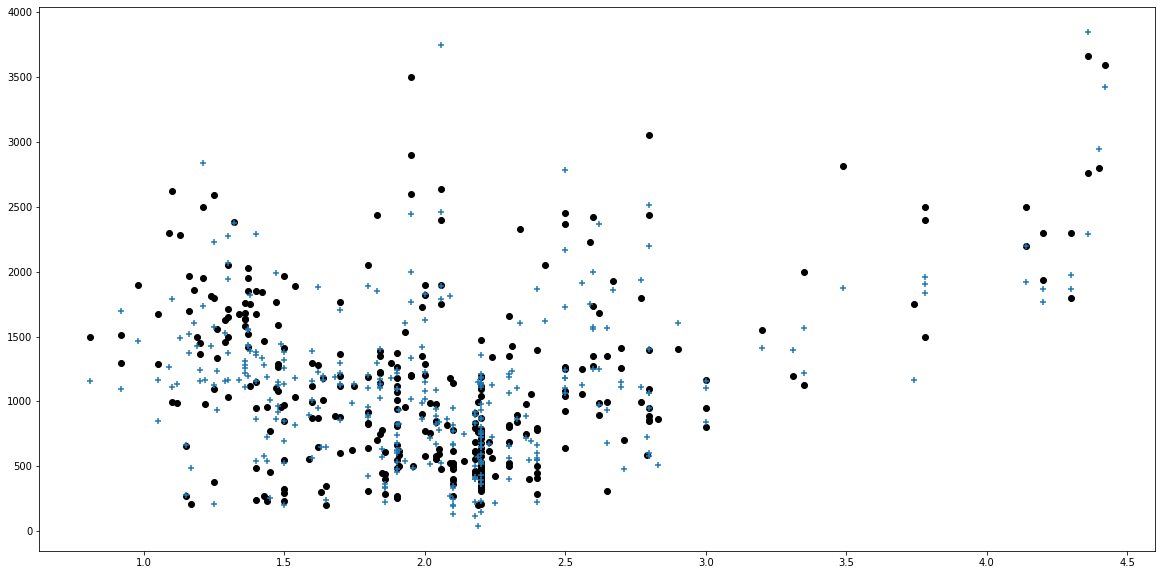

In [347]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter( X_test['Weight1'],y_test, color='black')
plt.scatter(X_test['Weight1'],predm1, marker = '+')
                    
plt.gcf().set_size_inches(20, 10)
plt.show()
#this was unexpectedly expected as I was expect a clear regression line show to correlation of cpu to price
#until I realize this is one of the short fall of label encoder as I have no control of which CPU would be which labelle.inverse_transform([0, 0, 1, 2])

R2 score : 0.7845859497060887
Mean squared error:  97018.70367220513
maxerror:  1498.0
mean absolute error :  209.6649230769231


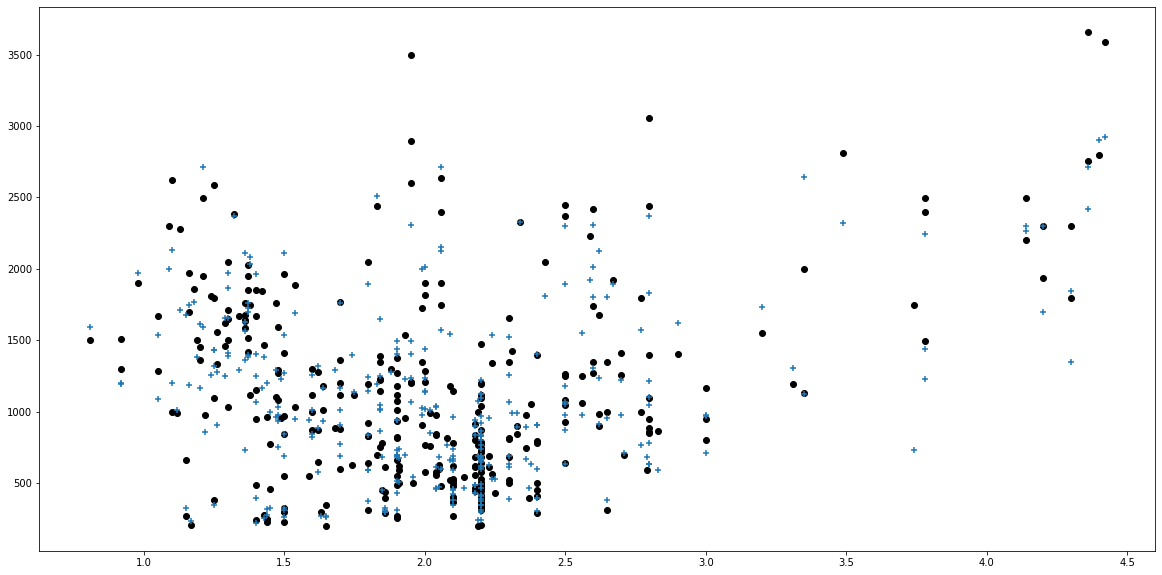

In [348]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
model2 = knr.fit(X_train,y_train)
predm2 = model2.predict(X_test)
print('R2 score :', model2.score(X_test, y_test))
print('Mean squared error: ', mean_squared_error(predm2,y_test))
print('maxerror: ', max_error(predm2,y_test))
print('mean absolute error : ', mean_absolute_error(predm2,y_test))

plt.scatter( X_test['Weight1'], y_test, color='black')
plt.scatter( X_test['Weight1'], predm2, marker = '+')
                    
plt.gcf().set_size_inches(20, 10)
plt.show()


R2 score : 0.8220998716419089
Mean squared error:  80123.09230930769
maxerror:  1301.0
mean absolute error :  192.47007692307693


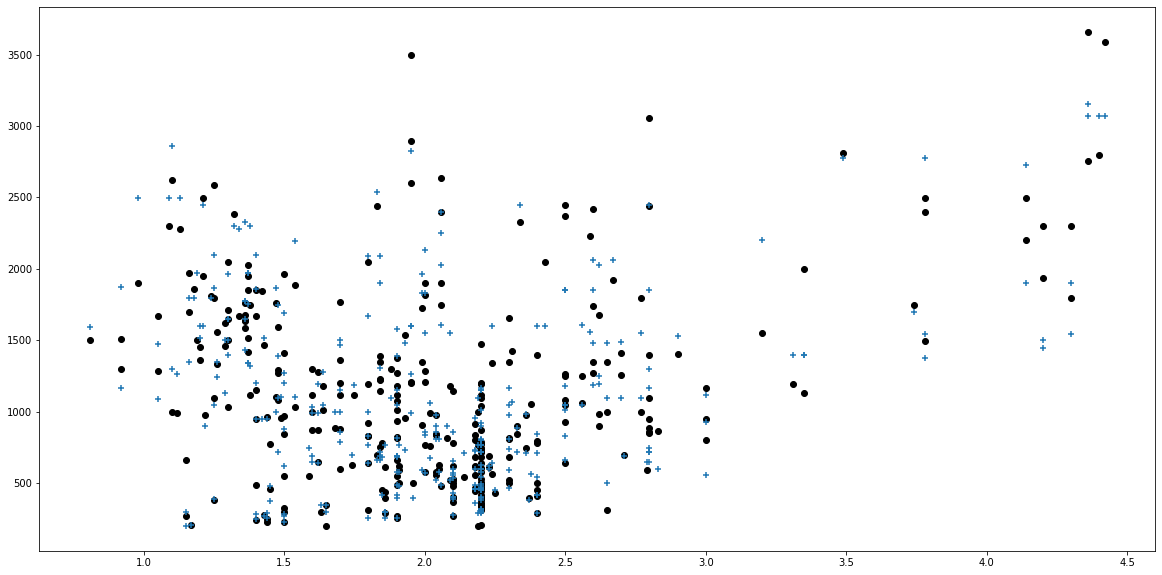

In [349]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
model3 = regressor.fit(X_train,y_train)
model3.score(X_test, y_test)

predm3 = model3.predict(X_test)
print('R2 score :', model3.score(X_test, y_test))
print('Mean squared error: ', mean_squared_error(predm3,y_test))
print('maxerror: ', max_error(predm3,y_test))
print('mean absolute error : ', mean_absolute_error(predm3,y_test))

plt.scatter(  X_test['Weight1'],y_test, color='black')
plt.scatter( X_test['Weight1'],predm3, marker = '+')
                    
plt.gcf().set_size_inches(20, 10)
plt.show()